In [1]:
%matplotlib inline

import os
import random
import copy
from decimal import Decimal, ROUND_HALF_UP
    
import matplotlib.pyplot as plt
import numpy as np
from netpyne import specs, sim
from neuron import h

random.seed(8)

folder = 'Ground truth SWCs'

cells = 12
exitatory_frac = 0.8

netParams = specs.NetParams()
netParams.sizeX = 800            # x-dimension (horizontal length) size in um
netParams.sizeY = 800            # y-dimension (vertical height or cortical depth) size in um
netParams.sizeZ = 10
netParams.propVelocity = 150   # propagation velocity (um/ms)
netParams.probLengthConst = 800


swc_filenames = []
for file in os.listdir(folder):
    if os.path.splitext(file)[-1] == '.swc':
        swc_filenames.append(file)

cell_labels = []
used_swcs = []
for ii in range(cells):
    swc_fname = swc_filenames[ii % len(swc_filenames)]
    used_swcs.append(swc_fname)
    
    label = f'trace_{ii:04d}'
    
    cellRule = netParams.importCellParams(
        label=label, 
        conds={'cellType': label},
        fileName=os.path.join(folder, swc_fname), 
        cellName=label,
        )
    
    cell_labels.append(label)
    
    # For convenience, we'll rename the first soma section in the morphology from `soma_0` to `soma`.
    netParams.renameCellParamsSec(label, 'soma_0', 'soma')
    
    for secName in cellRule['secs']:
        cellRule['secs'][secName]['geom']['cm'] = 1
        cellRule['secs'][secName]['mechs']['hh'] = {
            'gnabar': 0.12, 
            'gkbar': 0.036, 
            'gl': 0.003, 
            'el': -70,
            }
        
    # Postprocessing to allow for output
#     for ii, secName in enumerate(cellRule['secs']):
        
#         section_pts = cellRule['secs'][secName]['geom']['pt3d']
        
#         if len(section_pts) > 1:
#             old_pts = section_pts
#             cellRule['secs'][secName]['geom']['pt3d'] = [old_pts[0], old_pts[1]] # Linear approx
    
    cellRule_dict = cellRule.todict()
    for jj, secName in enumerate(cellRule['secs']):
          
        parentX = cellRule_dict['secs'][secName]['topol'].get('parentX')
        childX = cellRule_dict['secs'][secName]['topol'].get('childX')
        
        if (parentX == 1.0 or parentX == 0.0) and (childX == 0.0):
            pass
        elif parentX == {} and childX == {}:
            pass #soma
        
        elif parentX is None and childX is None:
            pass 
        elif type(parentX) is float and type(childX) is float:
            # clip to 0-1, round up for 0.5
            cellRule['secs'][secName]['topol']['parentX'] = max(
                min(float(Decimal(parentX).to_integral_value(rounding=ROUND_HALF_UP)), 1.0), 
                0.0)
            
            # clip to 0-1
            cellRule['secs'][secName]['topol']['childX'] = max(
                min(float(round(childX)), 1.0), 
                0.0)

            print(f"{parentX} --> {cellRule_dict['secs'][secName]['topol']['parentX']}\t" 
                  f"{childX} --> {cellRule_dict['secs'][secName]['topol']['childX']}")
            
        else:
            raise ValueError('Expected parentX and childX relative positions to be floats between 0-1.'
                             f'\n Instead, got parentX: {parentX} and childX: {childX}')
            
    X = random.random() * netParams.sizeX
    Y = random.random() * netParams.sizeY
    Z = random.random() * netParams.sizeZ

    cellRule['x'] = X
    cellRule['y'] = Y
    cellRule['z'] = Z


    netParams.popParams[label] = {'cellType'  : label,
                                  'cellModel' : 'HH3D', 
                                  'numCells'  : 1}

print(f'Added {ii+1} cells\n' 
    f'Used labels: {cell_labels}\n'
      f'Used {len(list(set(used_swcs)))} unique SWCs')


0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
0.5 --> 0.5	0.0 --> 0.0
Added 12 cells
U

In [2]:

## Synaptic mechanism parameters
netParams.synMechParams['exc'] = {'mod': 'Exp2Syn', 'tau1': 0.8, 'tau2': 5.3, 'e': 0}  # NMDA synaptic mechanism
netParams.synMechParams['inh'] = {'mod': 'Exp2Syn', 'tau1': 0.6, 'tau2': 8.5, 'e': -75}  # GABA synaptic mechanism

# Stimulation parameters
netParams.stimSourceParams['bkg'] = {'type': 'NetStim', 'rate': 20}
netParams.stimTargetParams['bkg->all'] = {'source': 'bkg', 'conds': {'cellList': range(cells)}, 'weight': 0.01, 'delay': 'max(1, normal(5,2))', 'synMech': 'exc'}



netParams.stimSourceParams['Probe'] = {'type': 'NetStim', 'rate': 60}
netParams.stimTargetParams['Probe->Cell'] = {'source': 'Probe', 'conds': {'cellList': range(cells)}, 'weight': 0.5, 'delay': '10', 'synMech': 'exc'}

# stim_ii = random.randint(0, cells-1)
# print(f'Cell # {stim_ii} is stimulated')
# netParams.stimSourceParams['Probe'] = {'type': 'NetStim', 'rate': 30}
# netParams.stimTargetParams['Probe->Cell'] = {'source': 'Probe', 'conds': {'cellList': [stim_ii]}, 'weight': 0.5, 'delay': '10', 'synMech': 'exc'}

In [3]:
# # Distance-based connectivity

# for label in cell_labels:
    
#     targets = copy.copy(cell_labels)
#     targets.remove(label)
    
#     preConds = {'cellType': label}
#     postConds = {'cellType': targets}
    
#     if random.random() < exitatory_frac:
    
#         netParams.connParams[f'{label}-E->All'] = {
#             'preConds': preConds, 
#             'postConds': postConds,
#             'probability': '0.4*exp(-dist_3D/probLengthConst)',  # probability of connection
#             'weight': '1',         # synaptic weight
#             'delay': 'dist_3D/propVelocity',      # transmission delay (ms)
#             'synMech': 'exc'}                     # synaptic mechanism
#     else:
#         netParams.connParams[f'{label}-I->All'] = {
#             'preConds': preConds, 
#             'postConds':  postConds,  #  E -> all (100-1000 um)
#             'probability': '0.2*exp(-dist_3D/probLengthConst)', # probability of connection
#             'weight': '0.1',         # synaptic weight
#             'delay': 'dist_3D/propVelocity',      # transmission delay (ms)
#             'synMech': 'inh'}  
        


In [4]:
# Simulation options
simConfig = specs.SimConfig()        # object of class SimConfig to store simulation configuration

simConfig.duration = 0.2*1e3           # Duration of the simulation, in ms
simConfig.dt = 0.005                 # Internal integration timestep to use
simConfig.verbose = False            # Show detailed messages
simConfig.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dict with traces to record
simConfig.recordCells = range(cells)
simConfig.recordStep = 1             # Step size in ms to save data (e.g. V traces, LFP, etc)
simConfig.filename = 'tut5'          # Set file output name
simConfig.savePickle = True         # Save params, network and sim output to pickle file

simConfig.analysis['plotTraces'] = {'oneFigPer' : 'trace' ,'saveFig': True}  # Plot recorded traces for this list of cells
simConfig.analysis['plot2Dnet'] = {'saveFig': True}                                                # plot 2D cell positions and connections
simConfig.analysis['plotConn'] = {'saveFig': True}                                                 # plot connectivity matrix

# Create network and run simulation
sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig)


Start time:  2022-05-31 14:58:59.220582

Creating network of 12 cell populations on 1 hosts...
  Number of cells on node 0: 12 
  Done; cell creation time = 0.02 s.
Making connections...
  Number of connections on node 0: 0 
  Done; cell connection time = 0.00 s.
Adding stims...
  Number of stims on node 0: 24 
  Done; cell stims creation time = 0.00 s.
Recording 12 traces of 1 types on node 0

Running simulation using NEURON for 200.0 ms...
  Done; run time = 2.04 s; real-time ratio: 0.10.

Gathering data...
  Done; gather time = 0.02 s.

Analyzing...
  Cells: 12
  Connections: 12 (1.00 per cell)
  Synaptic contacts: 24 (2.00 per cell)
  Spikes: 12 (5.00 Hz)
  Simulated time: 0.2 s; 1 workers
  Run time: 2.04 s
Saving output as tut5_data.pkl ... 
Finished saving!
  Done; saving time = 0.22 s.
Plotting recorded cell traces ... trace
Plotting 2D representation of network cell locations and connections...
Plotting connectivity matrix...
  Done; plotting time = 1.02 s

Total time = 3.33 

Plotting 3D cell shape ...


(<Figure size 640x480 with 2 Axes>, {})

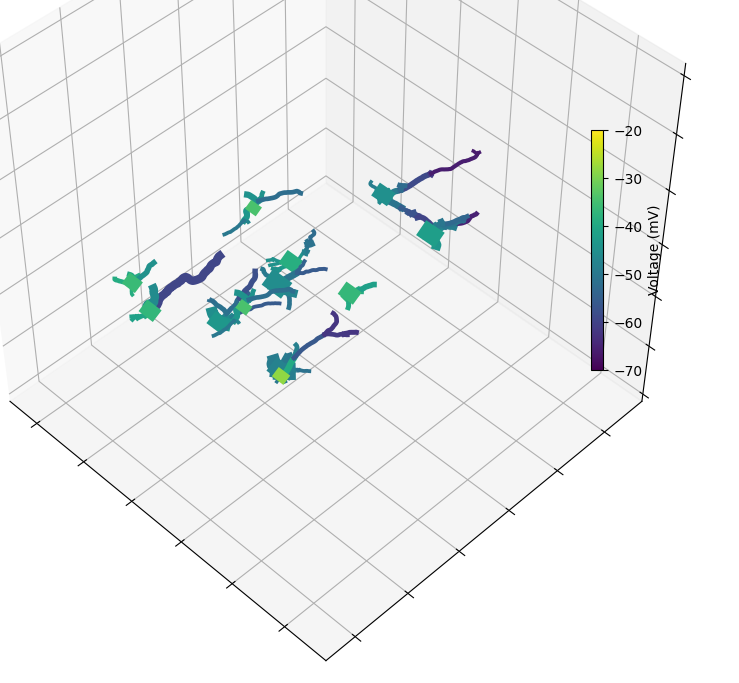

In [5]:
%matplotlib inline
sim.analysis.plotShape(
    cvar        = 'voltage', 
    clim        = [-70, -20], 
    showFig     = True,
    elev        = 45, 
    azim        = -45,
)

Min: -70.55707334566802 Max: 28.176395915196842


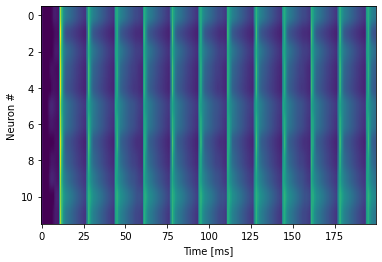

In [6]:
%matplotlib inline
data = []
for key, value in sim.simData['V_soma'].items():
    if key[0] is not '_':
        data.append(list(value))
        
data = np.array(data)

plt.imshow(data, aspect='auto', interpolation=None)
plt.xlabel('Time [ms]')
plt.ylabel('Neuron #')
print(f'Min: {data.min()} Max: {data.max()}')

In [7]:
# sim.createExportNeuroML2(netParams=netParams, 
#                        simConfig=simConfig,
#                        reference='SyntheticNetwork')  # create and export network to NeuroML 2

In [8]:
# from netpyne.support.morphology import shapeplot
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(1,1)

# shapeplot(h, ax)

In [9]:
from blenderneuron import neuronstart

BlenderNEURON running in NEURON and accessible by Blender with BlenderNEURON addon at: http://127.0.0.1:53617


In [10]:
# # Distance-based connectivity
# for ii in range(cells):
    
#     is_exitatory = random.random() < exitatory_frac
#     preConds = {'pop': str(ii)}
#     other_cells = copy.copy([str(ii) for ii in range(cells)])
#     other_cells.remove(str(ii))
#     postConds = {'pop': other_cells}
    
#     if is_exitatory:
#         netParams.connParams[f'{ii}E->all'] = {
#             'preConds': preConds, 
#             'postConds' : postConds,
#             'probability': '1*exp(-dist_3D/probLengthConst)',                  # probability of connection
#             'weight': '0.60',         # synaptic weight
#             'delay': 'dist_3D/propVelocity',      # transmission delay (ms)
#             'synMech': 'exc'}                     # synaptic mechanism
#     else:
#         netParams.connParams[f'{ii}I->all'] = {
#             'preConds': preConds, 
#             'postConds' : postConds,
#             'probability': '1*exp(-dist_3D/probLengthConst)',                  # probability of connection
#             'weight': '0.1',         # synaptic weight
#             'delay': 'dist_3D/propVelocity',      # transmission delay (ms)
#             'synMech': 'inh'}      
#               # synaptic mechanism

In [2]:
from pyneuroml.pynml import run_lems_with_jneuroml_neuron
run_lems_with_jneuroml_neuron(lems_file_name)

NameError: name 'lems_file_name' is not defined